# 1. Import Library

In [1]:
# Simple CNN model for the CIFAR-10 Dataset
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()

In [3]:
print("train data:",'images:',X_img_train.shape," labels:",y_label_train.shape) 
print("test  data:",'images:',X_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [9]:
#卷積層1與池化層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3, 3),input_shape=(32, 32,3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
#卷積層2與池化層2

In [12]:
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#卷積層3與池化層3

In [14]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [16]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

# 載入之前訓練的模型

In [18]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [20]:
train_history=model.fit(X_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=1, batch_size=300, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 626s - loss: 1.9201 - acc: 0.2838 - val_loss: 1.7381 - val_acc: 0.3571


In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

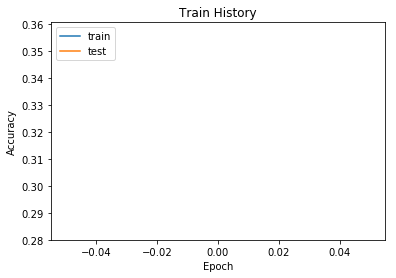

In [22]:
show_train_history('acc','val_acc')

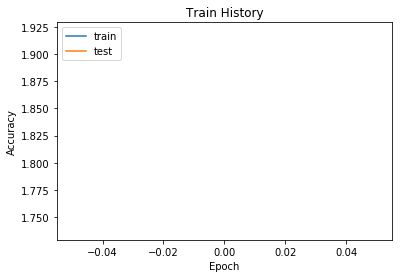

In [23]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [24]:
scores = model.evaluate(X_img_test_normalize, 
                        y_label_test_OneHot,verbose=0)
scores[1]

0.36170000000000002

# 進行預測

In [25]:
prediction=model.predict_classes(X_img_test_normalize)

10000/10000 [==============================] - 40s    


In [26]:
prediction[:10]

array([3, 8, 8, 8, 6, 6, 1, 6, 2, 8], dtype=int64)

In [27]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [28]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

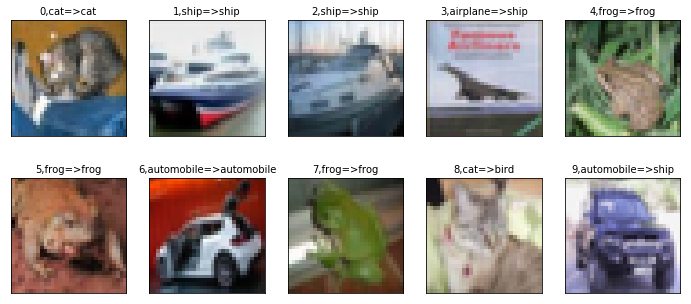

In [29]:
plot_images_labels_prediction(X_img_test_normalize,y_label_test,
                              prediction,0,10)

# 查看預測機率

In [30]:
Predicted_Probability=model.predict(X_img_test_normalize)

In [31]:
def show_Predicted_Probability(X_img,Predicted_Probability,i):
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(X_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

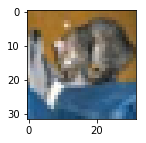

airplane Probability:0.013302130
automobile Probability:0.008979315
bird Probability:0.125432193
cat Probability:0.306852788
deer Probability:0.078588866
dog Probability:0.221698865
frog Probability:0.195712417
horse Probability:0.025604447
ship Probability:0.016940026
truck Probability:0.006888896


In [32]:
show_Predicted_Probability(X_img_test,Predicted_Probability,0)

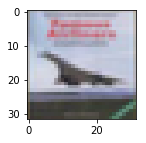

airplane Probability:0.191332355
automobile Probability:0.046644583
bird Probability:0.148919463
cat Probability:0.049545210
deer Probability:0.054918785
dog Probability:0.038482491
frog Probability:0.037348282
horse Probability:0.020897303
ship Probability:0.360433519
truck Probability:0.051477995


In [33]:
show_Predicted_Probability(X_img_test,Predicted_Probability,3)

# Save model to JSON

In [34]:
model_json = model.to_json()
with open("SaveModel/cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

# Save Model to YAML

In [35]:
model_yaml = model.to_yaml()
with open("SaveModel/cifarCnnModelnew.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)


# Save Weight to h5 

In [36]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk
